Y_data: 20640
y_data: 19648
y_data: 18665
Best parameters found: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
Predicción de precios de casas sin ruido:
MSE: 0.21620359113982826
MAE: 0.32798494053381827
RMSE: 0.4649769791503965
R2: 0.7750885423866705


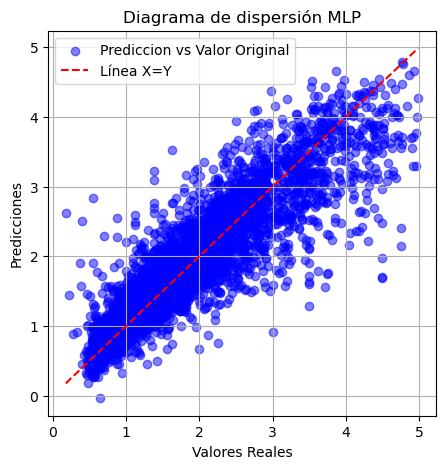


Epsilon = 1e-07
Error del ruido:
MSE: 3031537952224048.0
MAE: 13660314.124429801
RMSE: 55059403.84915231
R2: -1267421662270899.2


/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(



Predicción de precios con ruido:
MSE: 0.2550780716487348
MAE: 0.35445954770601756
RMSE: 0.5050525434533865
R2: 0.7346483441960472

Epsilon = 0.0001
Error del ruido:
MSE: 3105541872.4075975
MAE: 13996.695608143691
RMSE: 55727.38888919521
R2: -1298361129.2939827

Predicción de precios con ruido:
MSE: 0.26087661040750465
MAE: 0.36129074404893585
RMSE: 0.5107608152623933
R2: 0.7286162621321611

Epsilon = 0.1
Error del ruido:
MSE: 3093.5053821669862
MAE: 13.835448811673944
RMSE: 55.61928965895723
R2: -1292.3289292432023

Predicción de precios con ruido:
MSE: 0.27129093965186496
MAE: 0.37479248000897214
RMSE: 0.5208559682406115
R2: 0.7177824829240288

Epsilon = 0.5
Error del ruido:
MSE: 125.41033694751324
MAE: 2.7933032900521764
RMSE: 11.19867567828952
R2: -51.43139958164172

Predicción de precios con ruido:
MSE: 0.26190489457707844
MAE: 0.36723827512943197
RMSE: 0.511766445341113
R2: 0.7275465625485404

Epsilon = 1.0
Error del ruido:
MSE: 30.974712865006055
MAE: 1.3984805526256503
RMSE: 5.

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(



Predicción de precios con ruido:
MSE: 0.24102488927154045
MAE: 0.34397778173462923
RMSE: 0.4909428574401918
R2: 0.7492675358380425

Epsilon = 50
Error del ruido:
MSE: 0.012069794704163106
MAE: 0.027211032726882238
RMSE: 0.10986261740994116
R2: 0.9949538750600182

Predicción de precios con ruido:
MSE: 0.21844608667322837
MAE: 0.3304315656859932
RMSE: 0.4673821634093757
R2: 0.7727557275779552

Epsilon = 100
Error del ruido:
MSE: 0.0030769917964280796
MAE: 0.01386226574053829
RMSE: 0.05547063904831167
R2: 0.9987135750503926

Predicción de precios con ruido:
MSE: 0.2174741626797747
MAE: 0.32724117614633635
RMSE: 0.46634125131685994
R2: 0.7737667970098022

Epsilon = 500
Error del ruido:
MSE: 0.00012129166678209612
MAE: 0.00276035651543901
RMSE: 0.011013249601370892
R2: 0.9999492905289806

Predicción de precios con ruido:
MSE: 0.21865769743007546
MAE: 0.3244347942702551
RMSE: 0.4676084873375113
R2: 0.7725355939367042

Epsilon = 1000
Error del ruido:
MSE: 3.1368731668148616e-05
MAE: 0.001394

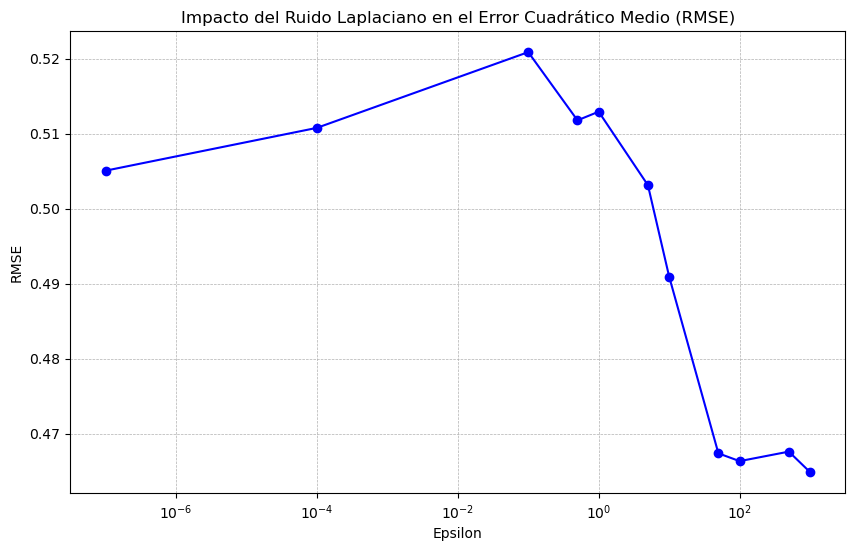

In [1]:
import numpy as np
import ModeloBase
from ModeloBase import read_data_model, add_laplace_noise, rmse
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score as r2
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

np.random.seed(0) 

all_data = fetch_california_housing()
X_train_val, X_val, X_test, Y_train_val, Y_val, Y_test = read_data_model(all_data, 'MedInc')

# Entrenamos el scanner con los datos train_val para evitar fuga de datos antes del entrenamiento
scaler = StandardScaler()
X_train_val_scaled = scaler.fit_transform(X_train_val)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

mlp = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=500, random_state=42)

# Definir los parámetros para la búsqueda en cuadrícula
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant', 'adaptive'],
}

# Configurar la búsqueda en cuadrícula
grid_search = GridSearchCV(mlp, param_grid, n_jobs=-1, cv=3, scoring='neg_mean_squared_error')

# Entrenar el modelo con la búsqueda de hiperparámetros
grid_search.fit(X_train_val_scaled, Y_train_val)
best_params = grid_search.best_params_

# Imprimir los mejores parámetros encontrados
print("Best parameters found:", best_params)

# Entrenamiento del modelo original sin ruido
model_original = MLPRegressor(**best_params, max_iter=500, random_state=42)
model_original.fit(X_train_val_scaled, Y_train_val)
Y_predict = model_original.predict(X_test_scaled)

# Evaluación del modelo original sin ruido
MSE_original = mse(Y_test, Y_predict)
MAE_original = mae(Y_test, Y_predict)
RMSE_original = rmse(Y_test, Y_predict)
R2_original = r2(Y_test, Y_predict)

print("Predicción de precios de casas sin ruido:")
print(f"MSE: {MSE_original}")
print(f"MAE: {MAE_original}")
print(f"RMSE: {RMSE_original}")
print(f"R2: {R2_original}")

# Diagrama de dispersión de predicciones vs valores originales
plt.figure(figsize=(5, 5))
plt.scatter(Y_test, Y_predict, alpha=0.5, color='blue', label='Prediccion vs Valor Original')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--', label='Línea X=Y')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Diagrama de dispersión MLP')
plt.legend()
plt.grid(True)

# Guardar la imagen antes de mostrarla
plt.savefig('diagrama_dispersion_MLP.png', dpi=300)
plt.show()

# Iterate over different epsilon values
epsilon_values = [0.0000001, 0.0001, 0.1, 0.5, 1.0, 5 , 10, 50, 100, 500, 1000]  # Ajustar según sea necesario
results = []

for epsilon in epsilon_values:
    print(f"\nEpsilon = {epsilon}")

    # Paso 1: Agregar ruido laplaciano a la columna de ingresos en el conjunto de entrenamiento
    X_train_val_noisy = add_laplace_noise(X_train_val, epsilon)

    MSE_original = mse(X_train_val, X_train_val_noisy)
    MAE_original = mae(X_train_val, X_train_val_noisy)
    RMSE_original = rmse(X_train_val, X_train_val_noisy)
    R2_original = r2(X_train_val, X_train_val_noisy)

    print("Error del ruido:")
    print(f"MSE: {MSE_original}")
    print(f"MAE: {MAE_original}")
    print(f"RMSE: {RMSE_original}")
    print(f"R2: {R2_original}")

    # Paso 2: Entrenar el modelo utilizando los valores de ingresos con ruido
    scaler = StandardScaler()
    X_train_val_noisy_scaled = scaler.fit_transform(X_train_val_noisy)
    X_test_scaled = scaler.transform(X_test)

    model_noisy = MLPRegressor(**best_params, max_iter=500, random_state=42)
    model_noisy.fit(X_train_val_noisy_scaled, Y_train_val)
    Y_predict = model_noisy.predict(X_test_scaled)

    # Paso 3: Evaluar el modelo entrenado con datos ruidosos usando el conjunto de validación original
    MSE_noisy = mse(Y_test, Y_predict)
    MAE_noisy = mae(Y_test, Y_predict)
    RMSE_noisy = rmse(Y_test, Y_predict)
    R2_noisy = r2(Y_test, Y_predict)

    print("\nPredicción de precios con ruido:")
    print(f"MSE: {MSE_noisy}")
    print(f"MAE: {MAE_noisy}")
    print(f"RMSE: {RMSE_noisy}")
    print(f"R2: {R2_noisy}")

    results.append((epsilon,MSE_noisy,MAE_noisy, RMSE_noisy, R2_noisy))

# Display the results
import pandas as pd
results_df = pd.DataFrame(results, columns=["Epsilon", "MSE" ,"MAE", "RMSE", "R2"])
print(results_df)


# Graficar el RMSE en función del valor de epsilon
plt.figure(figsize=(10, 6))
plt.plot(results_df["Epsilon"], results_df["RMSE"], marker='o', linestyle='-', color='blue')
plt.xscale('log')  # Usar escala logarítmica para epsilon
plt.xlabel('Epsilon')
plt.ylabel('RMSE')
plt.title('Impacto del Ruido Laplaciano en el Error Cuadrático Medio (RMSE)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig('MLP_rmse_vs_epsilon.png', dpi=300)
plt.show()
